In [1]:
import random

In [2]:
def shuffle(grps):
	num_grps = len(grps)
	pool = []
	
	# pool all values
	for i in range(num_grps):
		pool.extend(grps[i])
	# mix them up
	random.shuffle(pool)
	# reassign to groups of same size as original groups
	new_grps = []
	start_index = 0
	end_index = 0
	for i in range(num_grps):
		end_index = start_index + len(grps[i])
		new_grps.append(pool[start_index:end_index])
		start_index = end_index
	return new_grps

In [3]:
def meandiff(grpA, grpB):
	return sum(grpB) / float(len(grpB)) - sum(grpA) / float(len(grpA))

In [4]:
#draw histogram

def draw_hist(d, observed):
    hist,bin_edges = np.histogram(d,bins =5000)    
    plt.figure(figsize=[8,8])
    plt.bar(bin_edges[:-1], hist, width = 0.1, color='#0504aa',alpha=0.7)
    plt.xlim(min(min(bin_edges),-4), max(max(bin_edges),4))
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Difference',fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.title('Normal Distribution Histogram',fontsize=15)
    plt.axvline(x=observed, color='r', linestyle='dashed', linewidth=2)
    plt.show()

In [5]:
def diff2meansig(diet_1, diet_2, grpA, grpB):

    # list of lists
    samples = [grpA, grpB]
    a = 0
    b = 1

    observed_mean_diff = meandiff(samples[a], samples[b])
    all_mean_diffs = []

    count = 0
    num_shuffles = 10000

    for i in range(num_shuffles):
        new_samples = shuffle(samples)
        mean_diff = meandiff(new_samples[a], new_samples[b])
        all_mean_diffs.append(mean_diff)
        # if the observed difference is negative, look for differences that are smaller
        # if the observed difference is positive, look for differences that are greater
        if observed_mean_diff < 0 and mean_diff <= observed_mean_diff:
            count = count + 1
        elif observed_mean_diff >= 0 and mean_diff >= observed_mean_diff:
            count = count + 1
    
    draw_hist(all_mean_diffs, observed_mean_diff)

    ######################################
    #
    # Output
    #
    ######################################
    
    print("**********Diet: ", diet_1, " vs Diet: ", diet_2,"**********")

    print ("Observed difference of two means: %.2f" % observed_mean_diff)
    print (count, "out of", num_shuffles, "experiments had a difference of two means ", end="")
    if observed_mean_diff < 0:
        print ("less than or equal to", end="")
    else:
        print ("greater than or equal to", end=" ")
    print ("%.2f" % observed_mean_diff, ".")
    print ("The chance of getting a difference of two means", end=" ")
    if observed_mean_diff < 0:
        print ("less than or equal to ", end="")
    else:
        print ("greater than or equal to ", end="")
    print ("%.2f" % observed_mean_diff, "is", (count / float(num_shuffles)), ".")


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
chickweight = pd.read_csv('chick_weight.csv')
chickweight = chickweight.drop(['Unnamed: 0'], axis=1)

In [8]:
def get_final_weights_for_diet(diet):
    df_this_diet = chickweight[chickweight['Diet']==diet]
    final_weights = []
    chicks = list(df_this_diet.Chick.unique())
    for chick_num in chicks:
        temp_df = df_this_diet[df_this_diet['Chick']==chick_num]
        final_weight = list(temp_df['weight'])[-1]
        final_weights.append(final_weight)
    return final_weights

In [9]:
all_final_weights = {}
for i in range(1,5):
    all_final_weights[i] = get_final_weights_for_diet(i)

In [10]:
combinations = [[1,2], [1,3], [1,4], [2,3], [2,4], [3,4]]

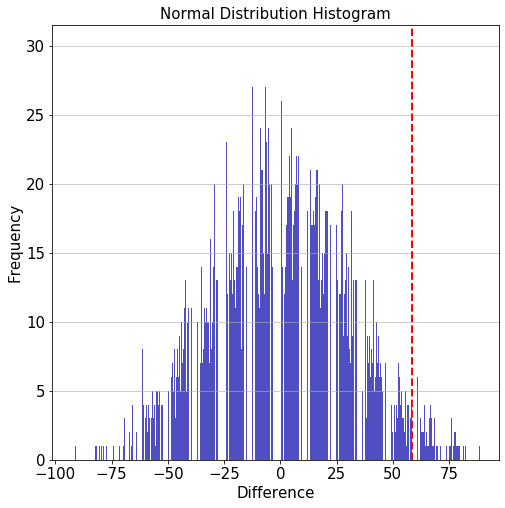

**********Diet:  1  vs Diet:  2 **********
Observed difference of two means: 58.40
262 out of 10000 experiments had a difference of two means greater than or equal to 58.40 .
The chance of getting a difference of two means greater than or equal to 58.40 is 0.0262 .


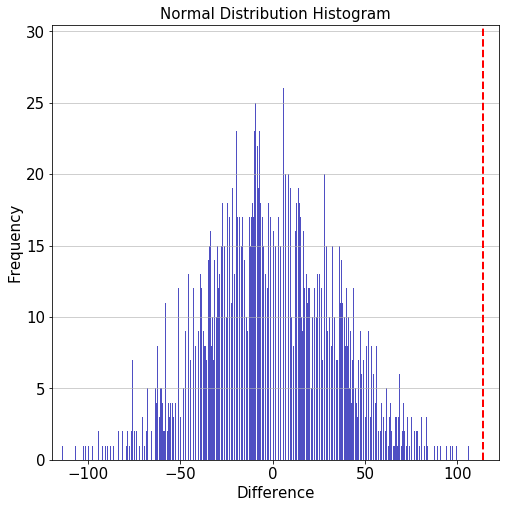

**********Diet:  1  vs Diet:  3 **********
Observed difference of two means: 114.00
2 out of 10000 experiments had a difference of two means greater than or equal to 114.00 .
The chance of getting a difference of two means greater than or equal to 114.00 is 0.0002 .


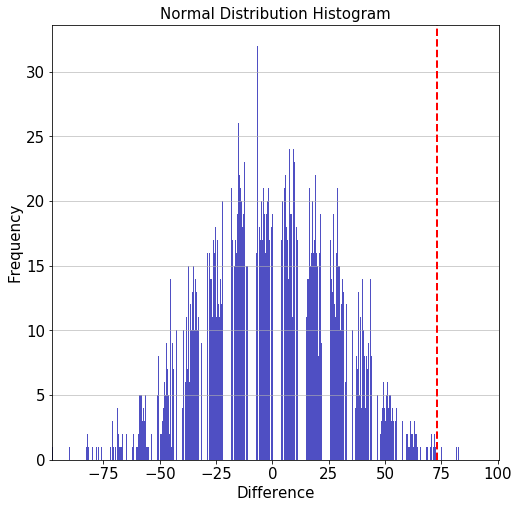

**********Diet:  1  vs Diet:  4 **********
Observed difference of two means: 73.00
31 out of 10000 experiments had a difference of two means greater than or equal to 73.00 .
The chance of getting a difference of two means greater than or equal to 73.00 is 0.0031 .


In [ ]:
for combination in combinations:
    diet_1, diet_2 = combination
    diff2meansig(diet_1, diet_2, all_final_weights[diet_1], all_final_weights[diet_2])